# BitCoin Price Prediction 
Time Series Forecasting using FBProphet

In [ ]:
import pandas as pd
from fbprophet import Prophet

Import data as panda dataframe

In [15]:
df = pd.read_csv('BTC-USD.csv')

In [16]:
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df.head())

           ds            y
0  2020-06-11  9321.781250
1  2020-06-12  9480.843750
2  2020-06-13  9475.277344
3  2020-06-14  9386.788086
4  2020-06-15  9450.702148


Initiate new object, pass data into prophet and fit data to the model

In [17]:
p = Prophet(daily_seasonality=True, yearly_seasonality=True)
p.fit(df)

Assign data to future dates

In [5]:
future = p.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-06-11
1   2020-06-12
2   2020-06-13
3   2020-06-14
4   2020-06-15
..         ...
726 2022-06-07
727 2022-06-08
728 2022-06-09
729 2022-06-10
730 2022-06-11

[731 rows x 1 columns]


Predict bitcoin price over the next 1 year based on the passed data

In [18]:
forecast = p.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
726,2022-06-07,64346.929427,61686.993114,66954.315255
727,2022-06-08,64590.905349,61880.664914,67057.190330
728,2022-06-09,64790.959351,62126.277287,67538.549036
729,2022-06-10,65087.343895,62291.130142,67580.601404
730,2022-06-11,65316.445825,62761.927380,68204.929811


Plot Forecast

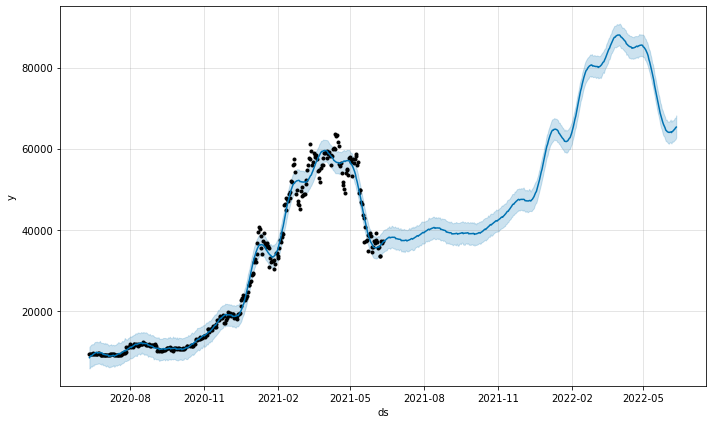

In [21]:
fig1 = p.plot(forecast)
fig1.savefig('fbprophet_prediction.png')

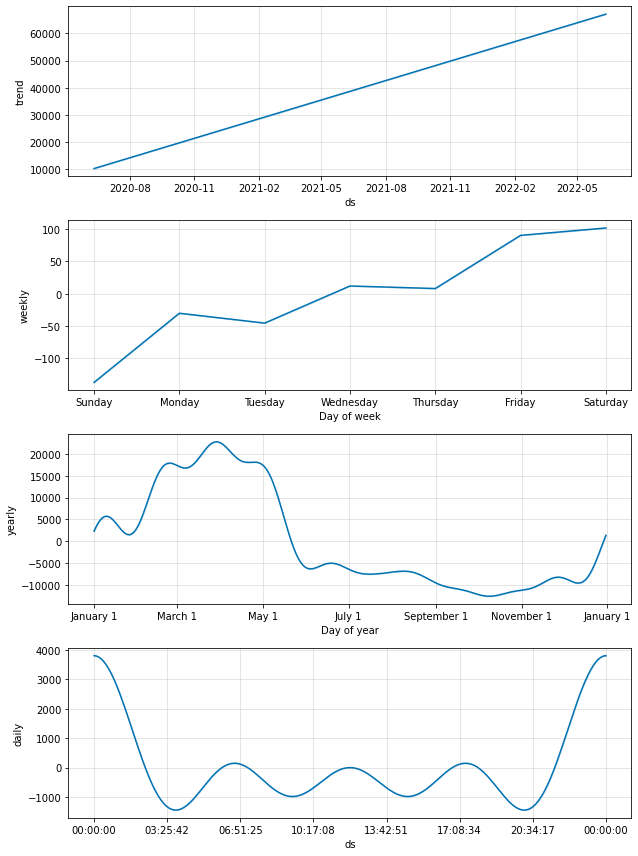

In [24]:
fig2 = p.plot_components(forecast)
fig2.savefig('Seasonality_trend.png')

Save output data

In [23]:
forecast.to_csv('bitcoin_price_prediction.csv', sep=',')